# İlk aşamalar

## Ana kütüphanelerin projeye eklenmesi

In [1]:
import os
import numpy as np
import pandas as pd

## Proje verisinin yolu

In [2]:
dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

## Verilerin x ve y değerlerinin DataFrame haline getirilmesi

In [3]:
df=pd.DataFrame(columns=["image","label"])

### Verilerin belirtilen dizin üzerinden projeye aktarılması

In [4]:
img_shape=(128,128,3) 

In [5]:
from tqdm import tqdm
from PIL import Image

main_directory = dir

for directory in tqdm(os.listdir(main_directory)):

    next_directory = os.path.join(main_directory, directory)
    if directory in ["README.txt", "license.txt", "Segmentation_example_script.m"]:
        continue

    for images_directory in os.listdir(next_directory):
        if "GT" not in images_directory:
            final_directory = os.path.join(next_directory, images_directory)
            for image in os.listdir(final_directory):
                img_path = os.path.join(final_directory, image)
                with Image.open(img_path) as img:
                    img = img.resize(img_shape[0:2])  # Boyutlandırma
                    img_array = np.asarray(img).astype('float32') / 255  # Normalize etme
                    #images.append(img_array)
                    #labels.append(images_directory)
                    df.loc[len(df.index)] = [img_array,images_directory] 

100%|██████████| 12/12 [02:37<00:00, 13.15s/it]


In [6]:
df.head()

,image,label
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",Hourse Mackerel
1,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",Hourse Mackerel
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",Hourse Mackerel
3,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",Hourse Mackerel
4,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",Hourse Mackerel


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 210.9+ KB


## Labelın kategorik veri tipine dönüştürülmesi

In [8]:
df['label']=df['label'].astype('category')

## Her bir sınıfın örneklem sayısı

In [9]:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

In [10]:
len(df['label'].unique())

9

In [11]:
df['image'][0].shape

(128, 128, 3)

# Verilerdeki her bir sınıfın görselleştirilmesi

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

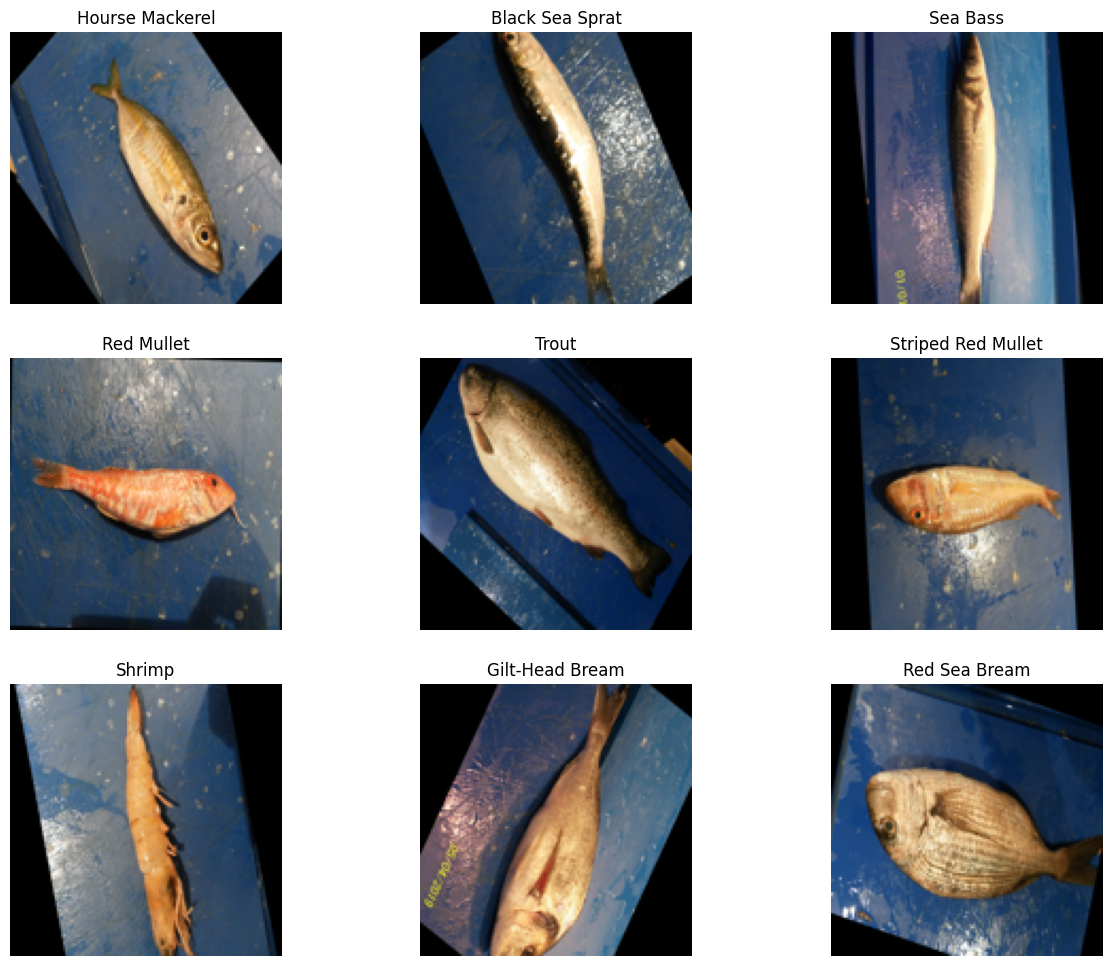

In [13]:
plt.figure(figsize=(15, 12))
for idx, label in enumerate(df['label'].unique()):
    plt.subplot(3, 3, idx + 1)
    plt.imshow(df[df['label'] == label].iloc[0, 0])
    plt.title(label)
    plt.axis('off')
plt.show()

# Sınıflar arası örneklem oranı

([<matplotlib.patches.Wedge at 0x79f5ce110e50>,
 [Text(1.0336618818860421, 0.3762221603465248, 'Hourse Mackerel'),
  Text(0.5499999925673781, 0.9526279484541089, 'Black Sea Sprat'),
  Text(-0.19101300952040004, 1.08328852582955, 'Sea Bass'),
  Text(-0.8426489003031623, 0.7070663553145996, 'Red Mullet'),
  Text(-1.0999999999999999, -2.5747358288378247e-08, 'Trout'),
  Text(-0.8426488672029966, -0.7070663947618405, 'Striped Red Mullet'),
  Text(-0.19101295880800456, -1.083288534771513, 'Shrimp'),
  Text(0.5500000371631095, -0.9526279227067503, 'Gilt-Head Bream'),
  Text(1.0336618994982714, -0.3762221119573192, 'Red Sea Bream')],
 [Text(0.563815571937841, 0.20521208746174077, '11.1%'),
  Text(0.29999999594584253, 0.519615244611332, '11.1%'),
  Text(-0.10418891428385456, 0.5908846504524817, '11.1%'),
  Text(-0.4596266728926339, 0.385672557444327, '11.1%'),
  Text(-0.5999999999999999, -1.4044013611842678e-08, '11.1%'),
  Text(-0.459626654837998, -0.3856725789610039, '11.1%'),
  Text(-0.1041

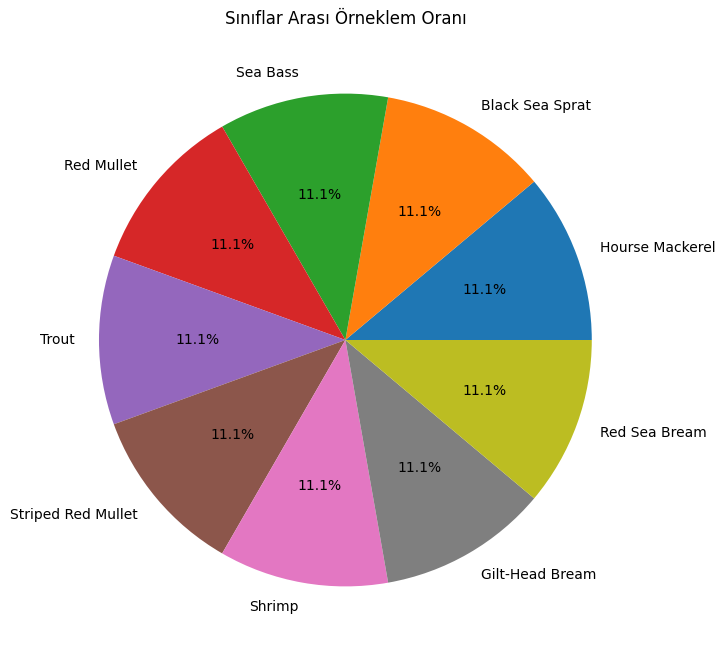

In [14]:
fig=plt.figure(figsize=(15,8))
plt.title('Sınıflar Arası Örneklem Oranı')
plt.pie(df["label"].value_counts(),labels=df["label"].unique(),autopct='%1.1f%%')

In [15]:
print(df["image"][0].shape)
df["label"].shape

(128, 128, 3)


(9000,)

# Verinin train, test ve validation olarak ayrılması

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(df["image"],df["label"], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Verilerin numpy dizilerine dönüştürülmesi

In [17]:
X_train = np.array([x for x in X_train])
y_train = np.array([y for y in y_train])
X_val = np.array([x for x in X_val])
y_val = np.array([y for y in y_val])
X_test = np.array([x for x in X_test])
y_test = np.array([y for y in y_test])

In [18]:
X_train.shape

(7200, 128, 128, 3)

# Verilerin Önişlenmesi

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

datagen.fit(X_train)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(7200, 128, 128, 3)
(900, 128, 128, 3)
(900, 128, 128, 3)


## Labelın OneHotEncoder ile eğitime uygun hale getirilmesi

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_val = encoder.transform(y_val.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Modelin tanımlanması

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer

In [23]:
from tensorflow.keras.optimizers import Adam

In [24]:
def ModelBuilder(hp):
    model=Sequential()

    hp_dropout= hp.Choice("dropout",values=[0.1,0.2,0.3,0.4])

    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=600, step=10)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=400, step=10)
    hp_layer_3 = hp.Int('layer_3', min_value=1, max_value=200, step=10)    

    model.add(Flatten(input_shape=img_shape))

    model.add(Dense(units=hp_layer_1,activation="relu"))
    model.add(Dropout(hp_dropout))

    model.add(Dense(units=hp_layer_2,activation="relu"))
    model.add(Dropout(hp_dropout))

    model.add(Dense(units=hp_layer_3,activation="relu"))
    model.add(Dropout(hp_dropout))

    model.add(Dense(units=9,activation="softmax"))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [25]:
!pip3 install keras-tuner

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [26]:
batch_size=16

# Keras Hyperband Tuner ile hiperparametre optimizasyonu

In [27]:
import keras_tuner as kt

tuner = kt.Hyperband(ModelBuilder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

stop_early = EarlyStopping(monitor='val_loss', patience=3)

## Hiperparametrelerin denenmesi

In [29]:
tuner.search(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_val, y_val), callbacks=[stop_early])

Trial 30 Complete [00h 00m 32s]
val_accuracy: 0.745555579662323

Best val_accuracy So Far: 0.8700000047683716
Total elapsed time: 00h 10m 11s


## En iyi hiperparametrelerin alınması

In [30]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_hps

In [31]:
model = tuner.hypermodel.build(best_hps)

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 461)            │    22,659,533 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 461)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 331)            │       152,922 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 331)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 81)             │        26,892 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 81)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │           738 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,840,085 (87.13 MB)

 Trainable params: 22,840,085 (87.13 MB)

 Non-trainable params: 0 (0.00 B)

# Bulunan parametrelerin K-Katli Çapraz Doğrulama tekniği ile eğitilmesi

In [33]:
from sklearn.model_selection import KFold

from tensorflow.keras.callbacks import EarlyStopping

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
hist_list=[]
cvscores = []

for train, test in kfold.split(X_train, y_train):
    # Modelin her katmanda yeniden eğitimi
    history=model.fit(X_train[train],
                y_train[train],
                validation_data=(X_val, y_val),
                epochs=100,
                verbose=1,
                callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])
    hist = history.history
    # Test verisi üzerinde değerlendirme
    scores = model.evaluate(X_train[test], y_train[test], verbose=1)
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2062 - loss: 2.1908 - val_accuracy: 0.5089 - val_loss: 1.4562
Epoch 2/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4597 - loss: 1.5065 - val_accuracy: 0.6322 - val_loss: 1.1309
Epoch 3/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5725 - loss: 1.2156 - val_accuracy: 0.6367 - val_loss: 0.9909
Epoch 4/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6302 - loss: 1.0502 - val_accuracy: 0.7200 - val_loss: 0.7912
Epoch 5/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7034 - loss: 0.8671 - val_accuracy: 0.7133 - val_loss: 0.7617
Epoch 6/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7289 - loss: 0.7808 - val_accuracy: 0.7856 - val_loss: 0.6761
Epoch 7/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7618 - loss: 0.6831 - val_accuracy: 0.7967 - val_loss: 0.5942
Epoch 8/100
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7767 - loss: 0.6273 - val_acc

# Model Değerlendirmesi

## Loss Değerleri

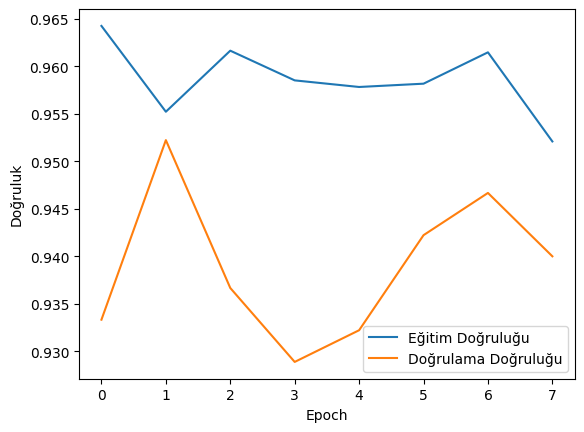

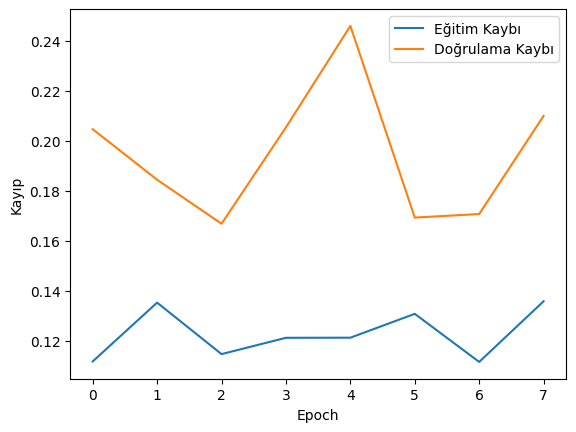

In [34]:
plt.plot(hist['accuracy'], label='Eğitim Doğruluğu')
plt.plot(hist['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

plt.plot(hist['loss'], label='Eğitim Kaybı')
plt.plot(hist['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

## Test Accuracy değeri

In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

29/29 - 0s - 4ms/step - accuracy: 0.9500 - loss: 0.1400
Test accuracy: 0.949999988079071


## Confussion matrix ve Classification Report metriklerinin değerleri

In [36]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        87
           1       0.99      0.90      0.94       100
           2       0.97      0.98      0.98       106
           3       0.98      0.95      0.96        85
           4       0.93      0.97      0.95        99
           5       0.90      0.97      0.93        97
           6       0.91      0.97      0.94       106
           7       0.99      0.92      0.96       116
           8       0.96      0.93      0.95       104

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



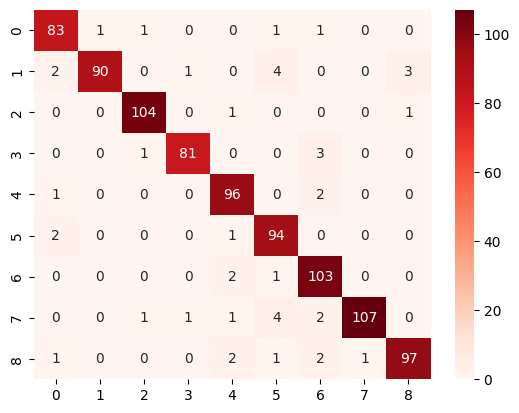

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_true_labels, y_pred_labels))
sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels), annot=True, fmt='d', cmap='Reds')
plt.show()

# Son Model Test Uygulaması

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


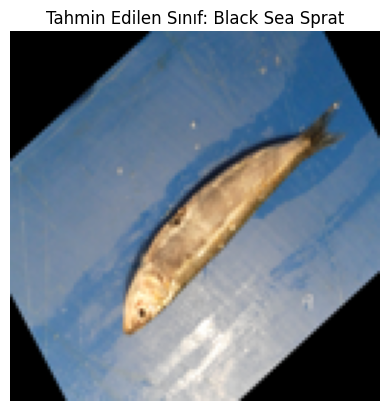

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from PIL import Image

# Örnek bir resim yükleme (Pillow ile)
image_path = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png'

# Görüntüyü Pillow ile aç, boyutlandır ve normalize et
test_img = Image.open(image_path)  # Görüntüyü aç
test_img = test_img.resize((img_shape[0], img_shape[1]))  # Yeniden boyutlandır
test_img_array = np.array(test_img).astype('float32') / 255  # NumPy dizisine dönüştür ve normalize et

# Modelin beklediği formatta giriş oluşturmak için boyutları genişlet
test_img_array = np.expand_dims(test_img_array, axis=0)  # (1, 225, 225, 3) boyutuna genişlet

# Modelden tahmin yapma
predictions = model.predict(test_img_array)

# Tahmin edilen sınıf indeksini bulma
predicted_class_index = np.argmax(predictions)

# One-Hot formatına uygun bir dizi oluşturma
one_hot_predicted_class = np.zeros((1, encoder.categories_[0].size))
one_hot_predicted_class[0][predicted_class_index] = 1

# One-hot formatındaki sınıfı ters dönüştür
predicted_class = encoder.inverse_transform(one_hot_predicted_class)

# Tahmin sonucunu görselleştirme (Pillow ile)
plt.imshow(test_img)  # test_img PIL imaj nesnesidir, NumPy dizisi değil
plt.title(f'Tahmin Edilen Sınıf: {predicted_class[0][0]}')
plt.axis('off')  # Eksenleri gizle
plt.show()